# Processamento de dados para o estudo da linguagem com Python


Ténicas orientadas à análise de conteúdo podem ser empregadas tanto para uma "<i>análise dos significados(ex: análise temática), quanto dos significantes (ex: análise lexicial)</i>". Habildiades de programação e de análise qualitativa podem elevar o nível dos pesquisadores e das pesquisas da área de letras.
<br><br>
O bjetivo é demonstrar como o uso de Python, e ferramentas baseadas em Python, pode facilitar uma fase preliminar, comum a vários tipos de pesquisas, que é a fase da <b>descrição analítica</b>. Seja para uma investigação heurística, ou para investigação de hipóteses, a descrição analítica é um processo bastante comum no estudo da linguagem. 
<br>


**Principais fontes**:<br>
- spaCy para a língua portuguesa: https://spacy.io/models/pt
- base de dados: https://basedosdados.org/dataset/br-senado-cpipandemia
- Análise de conteúdo: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_conte%C3%BAdo




  **Parte 1:** Processamento de dados (leitura, exploração e visualização dos dados).<br>
      **Parte 2:** Ferramentas linguísticas (remoção de pontuação, tokenização, palavras-instrumento, palavras-plenas e partes do discurso.)



### Pandas

pandas é uma biblioteca baseada em Python que permite realizar tarefas para a análise de dados com uma certa economia de código. <br>
É preciso fazer uma importação para usar as funções e métodos desta biblioteca.


In [1]:
import pandas as pd

#### carregando o arquivo discursos.csv e salvando em uma variável denominada df.

A fonte dos corpora deste arquivo é de língua oral. Trata-se dos discursos da CPI da Pandemia. <br><br>Trata-se de um conjunto de dados significativo. São 21 colunas e 54913 linhas com mensagens provinientes de discursos orais. Ou seja, ferramentas computacionais são mais que bem vindas para lidar com conteúdo desta magnitude. 
 

In [2]:
df = pd.read_csv("discursos.csv")

# PARTE 1: conhecendo o conjunto de dados
É preciso se apropriar das características mais salientes do conjunto de dados. Neste caso, os discursos da CPI da Pandemia.
### exibindo o cabeçaho da base de dados

In [3]:
df.head()

,sequencial_sessao,data_sessao,sigla_partido,sigla_uf_partido,bloco_parlamentar,nome_discursante,genero_discursante,categoria_discursante,texto_discurso,horario_inicio_discurso,...,duracao_discurso,sinalizacao_pela_ordem,sinalizacao_questao_ordem,sinalizacao_fora_microfone,sinalizacao_responder_questao_ordem,sinalizacao_por_videoconferencia,sinalizacao_para_interpelar,sinalizacao_para_expor,sinalizacao_para_depor,sinalizacao_como_presidente
0,1,2021-04-27,PSD,BA,NaN,OTTO ALENCAR,Masculino,Senador/a,"Invocando a proteção de Deus, declaro aberta a...",10:00:00,...,0.0,Não,Não,Não,Não,Não,Não,Não,Não,Sim
1,1,2021-04-27,PP,PI,Bloco Parlamentar Unidos pelo Brasil,CIRO NOGUEIRA,Masculino,Senador/a,"Sr. Presidente, Sras. e Srs. Senadores, eu ach...",10:00:00,...,240.0,Não,Sim,Não,Não,Não,Não,Não,Não,Não
2,1,2021-04-27,PSD,BA,NaN,OTTO ALENCAR,Masculino,Senador/a,"Senador Ciro Nogueira, esta é uma Comissão Par...",10:04:00,...,0.0,Não,Não,Não,Não,Não,Não,Não,Não,Sim
3,1,2021-04-27,PP,PI,Bloco Parlamentar Unidos pelo Brasil,CIRO NOGUEIRA,Masculino,Senador/a,"Sr. Presidente, não é o caso de indeferir ou n...",10:04:00,...,0.0,Não,Não,Não,Não,Não,Não,Não,Não,Não
4,1,2021-04-27,PSD,BA,NaN,OTTO ALENCAR,Masculino,Senador/a,Eu indeferi. Sou Presidente e posso indeferir.,10:04:00,...,0.0,Não,Não,Não,Não,Não,Não,Não,Não,Sim




Também é util verificar a descrição oficial do conjunto de dados. <br> https://basedosdados.org/dataset/br-senado-cpipandemia
<br>
<br>
A documentação dos dados lista três colunas identificadoras. Os dados estão na ordem em que forma produzidas nas sessões. 



### Verificando os ítens únicos da coluna 'sequencial_sessão'

In [4]:
df['sequencial_sessao'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37], dtype=int64)


De acordo com os dados acima, ocorreram 37 sessões ao longo de ... <b>quantos dias?</b> 
<br>
<br>
Na base dados podemos identificar facilmente a data inicial (da 1ª sessão) data final(da 37ª sessão). É possível obter o total de dias pela diferença entre o ultimo e o primeiro dia.
<br>

> ### Observação:   
Como veremos adiante, o tipo de dado representando as datas não é um formato de *tempo*, por assim dizer. Para contarmos os dias entre a data final, e a data inicial, é necessário converter o tipo de dado para **datetime**

<br>

### Analisando a coluna 'data_sessao'
#### Data inicial

In [5]:
# exibindo os três primeiros ítens da coluna sessão
df['data_sessao'].head(3)

0    2021-04-27
1    2021-04-27
2    2021-04-27
Name: data_sessao, dtype: object

#### Data final

In [6]:
# exbindo os três ultimos ítens da coluna data_sessao
df['data_sessao'].tail(3)

54910    2021-07-15
54911    2021-07-15
54912    2021-07-15
Name: data_sessao, dtype: object


É possível estipular um período de duração da CPI pelas datas inicial e final. Mas convertendo o tipo de dado de "objeto" para "datetime" podemos obter dados mais precisos, como por exemplo a quantidade de dias ou semanas decorridos entre a 1ª e a 37ª sessão.

 

### Convertendo a data: *de objeto para datetime*
importando módulos

In [7]:
import datetime

In [8]:
from dateutil.relativedelta import relativedelta

In [9]:
from datetime import date

#### Convertendo data
convertendo o objeto data para datetime e salvando e uma nova coluna

In [10]:
df['date_time'] = pd.to_datetime(df['data_sessao'], infer_datetime_format=True)

In [11]:
print("Data no conjunto de dados orinal:")
print(df[['data_sessao']].dtypes)
print()
print()
print("Data convertida para datetime:")
print(df[['date_time']].dtypes)

Data no conjunto de dados orinal:
data_sessao    object
dtype: object


Data convertida para datetime:
date_time    datetime64[ns]
dtype: object


#### Obtendo o total de dias entre a 1ª e a 37ª sessão
Encontrando a diferença entre o ultimo dia(índice 54912) e o primeiro dia(índice 0)

In [12]:
total_dias = df['date_time'][54912] - df['date_time'][0]

In [13]:
print(total_dias.days, "dias")

79 dias


>37 sessões ao longo de 79 dias.


### Exibindo informações mais gerais

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54913 entries, 0 to 54912
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   sequencial_sessao                    54913 non-null  int64         
 1   data_sessao                          54913 non-null  object        
 2   sigla_partido                        54913 non-null  object        
 3   sigla_uf_partido                     39182 non-null  object        
 4   bloco_parlamentar                    29630 non-null  object        
 5   nome_discursante                     54913 non-null  object        
 6   genero_discursante                   54913 non-null  object        
 7   categoria_discursante                54913 non-null  object        
 8   texto_discurso                       54913 non-null  object        
 9   horario_inicio_discurso              54913 non-null  object        
 10  horario_fi

### Filtrando colunas com informações mais relevantes 
Por ora, nenhuma das colunas identificadas com "sinalizacao_" apresenta dados que possam interessar. Seguiremos sem essas colunas. <br>
- Ao invés da coluna original "data_sessao", prosseguiremos com a coluna com dados convertidos "date_time". 
- Também podemos seguir com a duração do discurso, e descatar o horário inicial/final.

In [15]:
selecao = df[['sequencial_sessao', 'date_time', 'sigla_partido', 'sigla_uf_partido',
       'bloco_parlamentar', 'nome_discursante', 'genero_discursante',
       'categoria_discursante', 'texto_discurso', 'duracao_discurso']]

### Salvando as colunas filtradas em um novo dataframe

In [16]:
disc = df.filter(selecao)

In [17]:
disc.head(2)

,sequencial_sessao,date_time,sigla_partido,sigla_uf_partido,bloco_parlamentar,nome_discursante,genero_discursante,categoria_discursante,texto_discurso,duracao_discurso
0,1,2021-04-27,PSD,BA,NaN,OTTO ALENCAR,Masculino,Senador/a,"Invocando a proteção de Deus, declaro aberta a...",0.0
1,1,2021-04-27,PP,PI,Bloco Parlamentar Unidos pelo Brasil,CIRO NOGUEIRA,Masculino,Senador/a,"Sr. Presidente, Sras. e Srs. Senadores, eu ach...",240.0




Até aqui buscou-se apenas buscou-se capiturar uma visão geral acerca dos enventos envolvendo os dados.
<br>
<br>
Sabemos que a base de dados conta com: 
-  54.913 linhas
-  21 colunas originalmente (prosseguiremos com 10)
-  A CPI da Pandemia teve 37 sessões em 79 dias



#### Explorando a coluna categoria_discursante
As 54.913 linhas estão preenchidas por corpora de língua oral. A categoria_discursante parece reveladora das pessoas que produziram o corpora. Vale a pena explorar.

In [18]:
disc['categoria_discursante'].value_counts().to_frame()

,categoria_discursante
Senador/a,38287
Depoente/Convidado,16626



Há apenas duas categorias: 'Senador/a' e 'Depoente/Convidado'.
<br>
Aqui pode caber algumas decisões: (1) continuar o trabalho com a base de dados inteira. (2) limitar aos discursos dos parlamentares ou aos (3) discursos dos convidados. <br>
<br>
- Como o procedimento empregado é heurístico(para ver no que dá), pode ser interessante reduzir a base dados. Entre outros benefícios, é preciso levar em conta o consumo de recursos em termos de memória e processamento em tarefas que exigirão mais do equipamento no futuro.
<br>A tabela acima mostra que, se decidirmos pela categoria Senador/a, poderemos abrir mão de mais de 16 mil observações.


### Selecionando discursos dos Senadores e salvando em uma variável

In [19]:
sen = disc[disc['categoria_discursante']=='Senador/a']

### Veficiando a distribuição dos discursos entre os parlamentares

In [20]:
sen['nome_discursante'].value_counts().to_frame()

,nome_discursante
OMAR AZIZ,7067
RENAN CALHEIROS,7059
RANDOLFE RODRIGUES,4748
MARCOS ROGÉRIO,3501
ELIZIANE GAMA,1933
EDUARDO GIRÃO,1357
OTTO ALENCAR,1259
FERNANDO BEZERRA COELHO,1182
HUMBERTO COSTA,1145
ALESSANDRO VIEIRA,1142



Percebe-se um número destacado de observações relacionado a 4 individuos. Sabe-se que pelo menos 3 destes idivíduos atuaram como presidentes das sessões. <br>
Vale a pena explorar visualmente esta discrepancia de observações entre os individuos graficamente.


<AxesSubplot:>

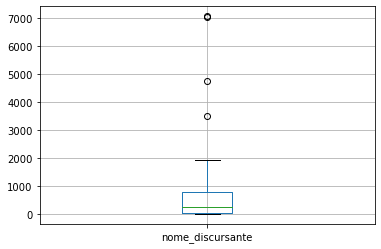

In [21]:
sen['nome_discursante'].value_counts().to_frame().boxplot()


O gráfico de caixa mostra o quão distante da média estão os indvídulos posicionados no topo da tabela.
Talvez o agrupamento pela categoria_discursante não seja a melhor escolha em razão desta discrepância dos individuos em relação à média.<br>
<br>
Além disso, podemos esperar que esses indivíduos, em relação aos demais, tenham produzido mais discursos "protocolares" (cerimonia de abertura, informações sobre a agenda do dia, leitura de documentos, etc.)<br>
- Vamos explorar a categoria 'bloco_parlamentar'.


In [22]:
sen['bloco_parlamentar'].value_counts().to_frame()

,bloco_parlamentar
Bloco Parlamentar Unidos pelo Brasil,11055
Bloco Parlamentar Senado Independente,8751
Bloco Parlamentar Vanguarda,4036
Bloco Parlamentar PODEMOSPSDB/PSL/,3539
Bloco Parlamentar da Resistência Democrática,2249



>As observações parecem melhor distribuídas por bloco_parlamentar. Vejamos o gráfico de caixa.


<AxesSubplot:>

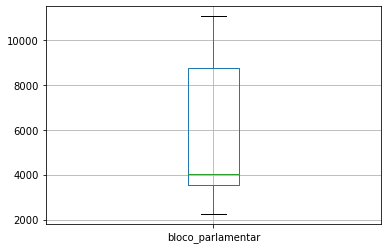

In [23]:
sen['bloco_parlamentar'].value_counts().to_frame().boxplot()

>Consideraremos os dados agrupados por bloco parlamentar.<br><br> Salvaremos as informações baseadas nos blocos palamentares em outra base de dados denominada bloco_p e esta será nossa base de dados daqui por diante.
<br>
    


> Nos exemplos acima, selecionamos os dados com base nos valores das colunas (categoria_discursante, bloco_parlamentar). Agora utilizaremos uma notação diferente para fazer a seleção com base nos dados orientados pelas linhas.

In [24]:
bloco_p = sen[(sen.bloco_parlamentar == 'Bloco Parlamentar Unidos pelo Brasil')\
    | (sen.bloco_parlamentar == 'Bloco Parlamentar Senado Independente')\
    | (sen.bloco_parlamentar == 'Bloco Parlamentar Vanguarda')\
    | (sen.bloco_parlamentar == 'Bloco Parlamentar PODEMOSPSDB/PSL/')\
    | (sen.bloco_parlamentar == 'Bloco Parlamentar da Resistência Democrática')]  

In [25]:
bloco_p.tail()

,sequencial_sessao,date_time,sigla_partido,sigla_uf_partido,bloco_parlamentar,nome_discursante,genero_discursante,categoria_discursante,texto_discurso,duracao_discurso
54906,37,2021-07-15,CIDADANIA,MA,Bloco Parlamentar Senado Independente,ELIZIANE GAMA,Feminino,Senador/a,... através do sistema remoto.,0.0
54907,37,2021-07-15,REDE,AP,Bloco Parlamentar Senado Independente,RANDOLFE RODRIGUES,Masculino,Senador/a,"Aliás, o que V. Exa. disse é a mais perfeita r...",0.0
54909,37,2021-07-15,REDE,AP,Bloco Parlamentar Senado Independente,RANDOLFE RODRIGUES,Masculino,Senador/a,"... esta oitiva, agradecer a você a contribuiç...",0.0
54911,37,2021-07-15,REDE,AP,Bloco Parlamentar Senado Independente,RANDOLFE RODRIGUES,Masculino,Senador/a,"Eu é que lhe agradeço, nós é que lhe agradecem...",240.0
54912,37,2021-07-15,REDE,AP,Bloco Parlamentar Senado Independente,RANDOLFE RODRIGUES,Masculino,Senador/a,Eu queria desejar o mais pronto restabelecimen...,NaN


In [26]:
bloco_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29630 entries, 1 to 54912
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sequencial_sessao      29630 non-null  int64         
 1   date_time              29630 non-null  datetime64[ns]
 2   sigla_partido          29630 non-null  object        
 3   sigla_uf_partido       29630 non-null  object        
 4   bloco_parlamentar      29630 non-null  object        
 5   nome_discursante       29630 non-null  object        
 6   genero_discursante     29630 non-null  object        
 7   categoria_discursante  29630 non-null  object        
 8   texto_discurso         29630 non-null  object        
 9   duracao_discurso       29618 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 2.5+ MB



>Como era de se esperar, houve uma leve reduzção nos dados selecionados por bloco parlamentar.


# PARTE 2: Ferramentas linguísticas
Depois de obter uma visão mais apropriada sobre o conjunto de dados, é hora de trabalhar sobre as mensagens. <br>
<br> Para evidenciar o resultado do emprego de ferramentas linguísticas, vamos isolar os discursos e salvá-los como um novo conjunto de dados chamado corpus.

In [27]:
discursos = bloco_p[['texto_discurso']]

In [28]:
corpus = bloco_p.filter(discursos) 

In [29]:
corpus.head()

,texto_discurso
1,"Sr. Presidente, Sras. e Srs. Senadores, eu ach..."
3,"Sr. Presidente, não é o caso de indeferir ou n..."
5,O senhor está indo contra o Regimento. Não é i...
7,Porque eu estou questionando hoje.
9,Não estou querendo dificultar...


# spaCy
Assim como a biblioteca Pandas facilita a análise dos dados com pouco código, a biblioteca **spaCy** facilita o processamento da lnguagem natural. Com a grande diferenca, que, ao invés de funções disponibilizadas pela biblioteca (como .head() de panas), também lidaremos com funções criadas pelo usuário (parte importante do conhecimento sobre Python que precisamos dominar).

In [30]:
import spacy

>Além de importar a biliboteca spaCy (no código acima), é preciso criar um objeto para "guardar" funções e o corpus da línguage portuguesa. Neste caso, o objeto se chama nlp (de natural lnaguage processing)

In [31]:
nlp = spacy.load("pt_core_news_sm")

# Engenharia de atributos
Agora vamos utilizar as funçoes guardadas no objeto nlp e as funções ciradas usando Python para performar uma engenharia de "atributos". Que nada mais é do que criar novas colunas com os resultados dos procedimentos empregados sobre as mensagens. 

### Função apra remover a pontuação do texto

In [32]:
def remove_pont(texto):
    doc = nlp(texto)
    limpa_pont = [palavra for palavra in doc if not palavra.is_punct]
    sem_pont = " ".join(palavra.text for palavra in limpa_pont)
    return sem_pont

#### aplicando a funcação sobre as mensagens e salvando o resultado em uma nova coluna

In [33]:
corpus['sem_pontuacao'] = corpus['texto_discurso'].apply(lambda x: remove_pont(x.lower()))

In [34]:
corpus.head()

,texto_discurso,sem_pontuacao
1,"Sr. Presidente, Sras. e Srs. Senadores, eu ach...",sr. presidente sras e srs senadores eu achava ...
3,"Sr. Presidente, não é o caso de indeferir ou n...",sr. presidente não é o caso de indeferir ou nã...
5,O senhor está indo contra o Regimento. Não é i...,o senhor está indo contra o regimento não é is...
7,Porque eu estou questionando hoje.,porque eu estou questionando hoje
9,Não estou querendo dificultar...,não estou querendo dificultar


#### tamanho das mensagens (caracteres)

In [35]:
corpus['tamanho'] = corpus['texto_discurso'].apply(lambda x: len(x) - x.count(" "))

In [36]:
corpus.head()

,texto_discurso,sem_pontuacao,tamanho
1,"Sr. Presidente, Sras. e Srs. Senadores, eu ach...",sr. presidente sras e srs senadores eu achava ...,847
3,"Sr. Presidente, não é o caso de indeferir ou n...",sr. presidente não é o caso de indeferir ou nã...,51
5,O senhor está indo contra o Regimento. Não é i...,o senhor está indo contra o regimento não é is...,91
7,Porque eu estou questionando hoje.,porque eu estou questionando hoje,30
9,Não estou querendo dificultar...,não estou querendo dificultar,29


## Tokenização

In [37]:
from spacy.tokenizer import Tokenizer

In [38]:
tokenizer = Tokenizer(nlp.vocab)

In [39]:
def tokenizacao(texto):
    token = tokenizer(texto)
    return token

In [40]:
corpus['tokens'] = corpus['sem_pontuacao'].apply(lambda x: tokenizacao(x))

In [41]:
corpus.head()

,texto_discurso,sem_pontuacao,tamanho,tokens
1,"Sr. Presidente, Sras. e Srs. Senadores, eu ach...",sr. presidente sras e srs senadores eu achava ...,847,"(sr., presidente, sras, e, srs, senadores, eu,..."
3,"Sr. Presidente, não é o caso de indeferir ou n...",sr. presidente não é o caso de indeferir ou nã...,51,"(sr., presidente, não, é, o, caso, de, indefer..."
5,O senhor está indo contra o Regimento. Não é i...,o senhor está indo contra o regimento não é is...,91,"(o, senhor, está, indo, contra, o, regimento, ..."
7,Porque eu estou questionando hoje.,porque eu estou questionando hoje,30,"(porque, eu, estou, questionando, hoje)"
9,Não estou querendo dificultar...,não estou querendo dificultar,29,"(não, estou, querendo, dificultar)"


In [42]:
corpus['tokens_qtd'] = corpus['tokens'].apply(lambda x: len(x))

In [43]:
corpus.head()

,texto_discurso,sem_pontuacao,tamanho,tokens,tokens_qtd
1,"Sr. Presidente, Sras. e Srs. Senadores, eu ach...",sr. presidente sras e srs senadores eu achava ...,847,"(sr., presidente, sras, e, srs, senadores, eu,...",182
3,"Sr. Presidente, não é o caso de indeferir ou n...",sr. presidente não é o caso de indeferir ou nã...,51,"(sr., presidente, não, é, o, caso, de, indefer...",12
5,O senhor está indo contra o Regimento. Não é i...,o senhor está indo contra o regimento não é is...,91,"(o, senhor, está, indo, contra, o, regimento, ...",23
7,Porque eu estou questionando hoje.,porque eu estou questionando hoje,30,"(porque, eu, estou, questionando, hoje)",5
9,Não estou querendo dificultar...,não estou querendo dificultar,29,"(não, estou, querendo, dificultar)",4


In [44]:
from spacy.lang.pt.stop_words import STOP_WORDS

## Stopwords (palavra-instrumento)

In [45]:
def palavra_instrumento(sem_pontuacao):
    doc = nlp(sem_pontuacao)
    pi = [palavra.text for palavra in doc if palavra.is_stop==True]
    return pi

In [46]:
corpus['palavra_instrumento'] = corpus['sem_pontuacao'].apply(lambda x: palavra_instrumento(x))

In [47]:
corpus['pi_qtde'] = corpus['palavra_instrumento'].apply(lambda x: len(x))

In [48]:
corpus.head(2)

,texto_discurso,sem_pontuacao,tamanho,tokens,tokens_qtd,palavra_instrumento,pi_qtde
1,"Sr. Presidente, Sras. e Srs. Senadores, eu ach...",sr. presidente sras e srs senadores eu achava ...,847,"(sr., presidente, sras, e, srs, senadores, eu,...",182,"[e, eu, que, nós, a, até, que, um, que, não, c...",106
3,"Sr. Presidente, não é o caso de indeferir ou n...",sr. presidente não é o caso de indeferir ou nã...,51,"(sr., presidente, não, é, o, caso, de, indefer...",12,"[não, é, o, de, ou, não, isso, aqui]",8


## Palavras de conteúdo (palavras plenas)

In [49]:
def palavras_plenas(sem_pontuacao):
    doc = nlp(sem_pontuacao)
    pp = [palavra.text for palavra in doc if palavra.is_stop==False]
    return pp

In [50]:
corpus['palavras_plenas'] = corpus['sem_pontuacao'].apply(lambda x: palavras_plenas(x))

In [51]:
corpus['pp_qtde'] = corpus['palavras_plenas'].apply(lambda x: len(x))

In [52]:
corpus.head()

,texto_discurso,sem_pontuacao,tamanho,tokens,tokens_qtd,palavra_instrumento,pi_qtde,palavras_plenas,pp_qtde
1,"Sr. Presidente, Sras. e Srs. Senadores, eu ach...",sr. presidente sras e srs senadores eu achava ...,847,"(sr., presidente, sras, e, srs, senadores, eu,...",182,"[e, eu, que, nós, a, até, que, um, que, não, c...",106,"[sr., presidente, sras, srs, senadores, achava...",76
3,"Sr. Presidente, não é o caso de indeferir ou n...",sr. presidente não é o caso de indeferir ou nã...,51,"(sr., presidente, não, é, o, caso, de, indefer...",12,"[não, é, o, de, ou, não, isso, aqui]",8,"[sr., presidente, caso, indeferir]",4
5,O senhor está indo contra o Regimento. Não é i...,o senhor está indo contra o regimento não é is...,91,"(o, senhor, está, indo, contra, o, regimento, ...",23,"[o, está, contra, o, não, é, isso, o, faz, par...",15,"[senhor, indo, regimento, senhor, cpi, pandemi...",8
7,Porque eu estou questionando hoje.,porque eu estou questionando hoje,30,"(porque, eu, estou, questionando, hoje)",5,"[porque, eu, estou]",3,"[questionando, hoje]",2
9,Não estou querendo dificultar...,não estou querendo dificultar,29,"(não, estou, querendo, dificultar)",4,"[não, estou]",2,"[querendo, dificultar]",2


In [53]:
def partes_discurso(sem_pontuacao):
    doc = nlp(sem_pontuacao)
    pf = [palavra.pos_ for palavra in doc if palavra.is_stop==False]
    return pf

In [54]:
corpus['partes_discurso'] = corpus['sem_pontuacao'].apply(lambda x: partes_discurso(x))

In [55]:
corpus.head(2)

,texto_discurso,sem_pontuacao,tamanho,tokens,tokens_qtd,palavra_instrumento,pi_qtde,palavras_plenas,pp_qtde,partes_discurso
1,"Sr. Presidente, Sras. e Srs. Senadores, eu ach...",sr. presidente sras e srs senadores eu achava ...,847,"(sr., presidente, sras, e, srs, senadores, eu,...",182,"[e, eu, que, nós, a, até, que, um, que, não, c...",106,"[sr., presidente, sras, srs, senadores, achava...",76,"[VERB, NOUN, ADJ, VERB, NOUN, VERB, VERB, VERB..."
3,"Sr. Presidente, não é o caso de indeferir ou n...",sr. presidente não é o caso de indeferir ou nã...,51,"(sr., presidente, não, é, o, caso, de, indefer...",12,"[não, é, o, de, ou, não, isso, aqui]",8,"[sr., presidente, caso, indeferir]",4,"[NOUN, NOUN, NOUN, VERB]"


Com um conjunto de dados como este aí acima, é possível propor análises de diversos tipos: por meio da linguística estatísitca, análise léxical, etc... Viste o site do spaCy para conhecer mais funcionalidades que podem enriquecer suas análises: https://spacy.io/models/pt
### Principais noções de Python utlizadas neste notebook:
- Tipos de dados
- Operadores lógicos
- Variáveis
- Condicionas
- Laços de repetição
- Funções
- List comprehension
- Fuções lambda
    
### Principais noções de Pandas:
- Importar biblioteca
- Carregar arquivo csv pd.read_csv()
- Funções e métodos: head(), apply(), value_counts(), to_frame(), bloxplot(), unique(), filter()
    - **NOTAÇÃO**: 
        - **nome_base_dados[['nome_coluna']]** - seleciona uma coluna da base de dados para aplicar funções/métodos exclusivamente sobre essa coluna.
        - **nome_base_dados[(nome_base_dados == 'valores_selecionados_em_uma_coluna')]** - retorna uma tabela identica à original, contendo apenas as linhas nas quais os valores indicados estão presentes. A barra invertida no final de cada parenteses permite inserir o parenteses seguinte em uma nova linha e evitar inserir os valores de forma contínua na celula.

### Principais noções de spaCy:  
- spacy.load("pt_core_news_sm"): carrega o corpus da língua portuguesa.
- is_punct: contém um conjunto de pontuação presentes em textos da língua portuguesa.
- Tokenizer: separa o texto em segmentos de palavras.
- is_stop: contém um conjunto de palavras-instrumento da língua portuguesa.
- pos_: classifica palavras do texto de acordo com as partes do discurso.
        
    

### Programa usado para interagir com os dados com Python:
O software **Anaconda** elimina um dos grandes obstaculos para quem quer começar a usar Python: a própria instalação de Python. Você pode baixar por esse link https://www.anaconda.com/products/individual